<h1>ИЗМЕРЕНИЕ УДЕЛЬНОГО ЗАРЯДА ЭЛЕКТРОНА<h1>

В ходе данной лаборатоной работы необходимо было получить удельный заряд электрона $e$/$m$. Есть два метода получения данной константы по закону "Трех вторых" и с помощью метода магнетрона. 

Код из данных:

In [11]:
import matplotlib.pyplot as plt
import numpy as np
### Данные 1 метод
    
U_1 = np.array([9, 20, 30, 40, 51, 60, 71, 80, 91, 100])
I_1 = np.array([0.356, 1.241, 2.290, 3.127, 4.401, 5.583, 6.998, 8.180, 10.83, 11.423])
    
### Данные 2 метод

U_2 = np.array([30, 40, 50])
B_U_30_1 = np.array([])
B_U_40_1 = np.array([])
B_U_50_1 = np.array([])
i = 0
while (i < 3.1):
    B_U_30_1 = np.append(B_U_30_1, i * 9.8)
    B_U_40_1 = np.append(B_U_40_1, i * 9.8)
    B_U_50_1 = np.append(B_U_50_1, i * 9.8)
    i += 0.1   
I_U_30_2 = np.array([2.063, 2.064, 2.064, 2.065, 2.065, 2.065, 2.066, 2.066, 2.065, 2.065, 2.049, 2.027, 1.996, 1.9444, 1.814, 1.612, 1.412, 1.210, 1.001, 0.975, 0.924, 0.916, 0.817, 0.762, 0.716, 0.681, 0.636, 0.601, 0.573, 0.545, 0.526])
I_U_40_2 = np.array([3.157, 3.155, 3.155, 3.155, 3.155, 3.158, 3.157, 3.159, 3.160, 3.155, 3.142, 3.113, 3.091, 3.038, 2.931, 2.796, 2.570, 2.397, 1.931, 1.671, 1.430, 1.401, 1.398, 1.356, 1.302, 1.207, 1.144, 1.082, 1.033, 0.980, 0.931])
I_U_50_2 = np.array([4.347, 4.353, 4.356, 4.358, 4.358, 4.359, 4.361, 4.362, 4.363, 4.361, 4.350, 4.329, 4.295, 4.240, 4.175, 4.009, 3.775, 3.346, 3.103, 2.774, 2.437, 2.026, 1.834, 1.800, 1.761, 1.740, 1.730, 1.679, 1.586, 1.520, 1.500])

Закон "трех вторых" устанавливает связь силы тока и напряжения I ~ U^{3/2} , при малых областях тока. Проводя все необходимые выкладки устанавливается формула для нахождения удельного заряда электрона.
$$
\frac{e}{m} = \biggl(\frac{C}{A*\varepsilon}\biggl)^2
$$
где $C \equiv I=CU^{3/2}$, A = 2.85, $\varepsilon$ - электрическая постоянная

В ходе обработки были полученные следующие значения С $= 0.0115 \frac{мA}{B^{3/2}}$ и $e$/$m$ = $1.2*10^{12}\frac{\text{Кл}}{\text{кг}}$

Код обработки первым методом:


A = 0.011538611523373139  B = 0.19906767190314983


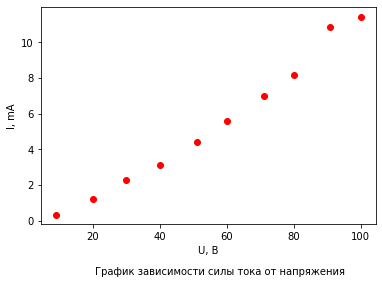

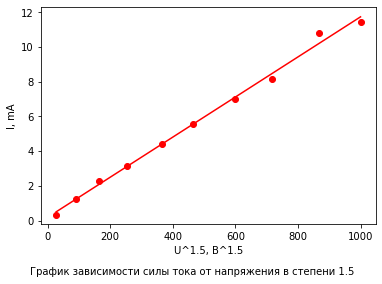

e / m = 211666456632.7455


In [13]:
### 1 метод

def approximation_funk_I_U_pow(I, U_pow):
    A = np.vstack([U_pow, np.ones(len(U_pow))]).T
    m, c = np.linalg.lstsq(A, I, rcond=None)[0]
    return m, c



def grafic_I_U(I, U):
    plt.plot(U, I, 'ro')
    plt.xlabel("U, В")
    plt.ylabel("I, mA")
    plt.figtext(0.25, -0.05, "График зависимости силы тока от напряжения")
    plt.show()



def grafic_I_U_pow(I, U):
    m, c = approximation_funk_I_U_pow(I, U)
    plt.plot(U, m * U + c, 'r')
    plt.plot(U, I, 'ro') 
    plt.xlabel("U^1.5, В^1.5")
    plt.ylabel("I, mA")
    plt.figtext(0.1, -0.05, "График зависимости силы тока от напряжения в степени 1.5")
    plt.show()
    
def result_1(A):
    e_m = (A * 0.001 / (2.85 * 8.8 * 10 ** (-12))) ** 2
    return e_m

### Обработка 1 метода
    
U_pow = U_1 ** 1.5
m, c = approximation_funk_I_U_pow(I_1, U_pow)
print("A =", m," B =",  c)
grafic_I_U(I_1, U_1)
grafic_I_U_pow(I_1, U_pow)
print("e / m =", result_1(m))

Значение $e$/$m$ может быть найдено по траектории электрона в заданном магнитном. Это называется методом магнетрона. Из графика силы тока от магнитной индукции мы должны зафиксировать спад силы тока и получить значение магнитной индукции. С помощью формулы:
\begin{equation}
    \frac{e}{m} = \frac{8U}{B^2r^2}
\end{equation}
где $U$ - напряжение, $B$ - магнитная индукция при спаде тока, $r$ - радиус анода

Код обработки вторым методом:

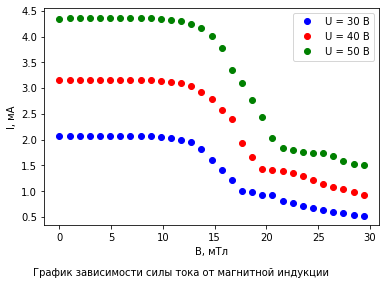

1: e / m =96000000000.0
2: e / m =265420800000.0
3: e / m =456976000000.0


In [17]:
### 2 метод   
    

def grafic_I_B(I1, I2, I3, B1, B2, B3):
    plt.plot(B1, I1, 'ro', color = 'b')
    plt.plot(B2, I2, 'ro', color = 'r')
    plt.plot(B3, I3, 'ro', color = 'g')
    plt.xlabel("B, мТл")
    plt.ylabel("I, мА")
    plt.legend(['U = 30 В','U = 40 B','U = 50 B'], loc=1)
    plt.figtext(0.1, -0.05, "График зависимости силы тока от магнитной индукции")
    plt.show()
    
    
def result_2(U):
    print("1: e / m =" + str((8 * U[0]) / (5 * 10 ** (-3) * 10 ** (-2)) ** 2))
    print("2: e / m =" + str((8 * U[1]) / (5 * 10 ** (-3) * 12 ** (-2)) ** 2))
    print("3: e / m =" + str((8 * U[2]) / (5 * 10 ** (-3) * 13 ** (-2)) ** 2))

    
    ### Обработка 2 метода 
    
    
grafic_I_B(I_U_30_2, I_U_40_2, I_U_50_2, B_U_30_1, B_U_40_1, B_U_50_1)
result_2(U_2)

Был получен уделный заряд электрона со снятых данных при 3 напряжений:

$e$/$m$ = $9.6*10^{11}\frac{\text{Кл}}{\text{кг}}$ (U = 30B)

$e$/$m$ = $2.6*10^{12}\frac{\text{Кл}}{\text{кг}}$ (U = 40B)

$e$/$m$ = $4.5*10^{12}\frac{\text{Кл}}{\text{кг}}$ (U = 50B)

Истинное значение $e$/$m$ = $1.75*10^{11}\frac{\text{Кл}}{\text{кг}}$